***

<div align="center">
  <h3> Desarrollo de un gestor de inteligencia colectiva y un marco de trabajo para el aprendizaje a través de la resolución colaborativa de      problemas en entornos educativos transmediales </h3>
  <h4> Reporte técnico de Análisis de Datos. </h4>
  <h5> Validación e implementación de módelos matemáticos para el aprendizaje supervisado bajo el lenguaje de programación Julia </h5>
  <h3> RT - 005 </h3>
  <h3> JOHN FABER FLÓREZ VASCO - MÓDULO DE DATOS - GIANT </h3>
</div>

***

<div align="center">
  <h2> RESUMEN </h2>
</div>

<p style='text-align: justify;'> 
  Este reporte técnico tiene como objetivo evidenciar el conjunto de modelos mátemáticos que apoyan el proceso de aprendizaje automático, creando una serie de algorítmos que posteriormente van a ser implementados y validados con el conjunto de datos que se obtengan del gestor de inteligencia colectiva GIANT. Se va a tener en cuenta un conjunto de datos que permita validar algoritmos de aprendizaje supervisado bajo el lenguaje de programación Julia.
</p>

<div align="center">
  <h2>INTRODUCCIÓN</h2>
</div>
<p style='text-align: justify;'> 
  Al enfrentar un problema donde se encuentran datos que suelen ser relevantes y de los cuales se quiere lograr construir modelos que permitan entender el comportamiento de los datos utilizando modelos de aprendizaje automático. Al momento de construir un modelo con el fin de buscar solución a nuestro problema debemos tener claro que este es un proceso que conlleva a no desviar la tarea de aprendizaje.

  Por medio de distintos modelos de aprendizaje supervisado bajo el lenguaje de programación Julia se van a implementar, validar y ejecutar algoritmos que nos permitan realizar la tarea de aprendizaje una vez se tengan los datos correspondientes a la o las distintas iteraciones en el gestor de inteligencia colectiva GIANT.
  
 En este reporte vamos a preparar datos para evidenciar la familiarización con el lenguaje de programación Julia y evaluar los resultados con el módelo de Regresión Lineal

Para la validación de los modelos se va a implementar un conjunto de datos respecto a la esperanza de vida de una persona de acuerdo a varias variables involucradas.

  
<p style='text-align: justify;'> 

<p style='text-align: justify;'> 
  Para esta implementación, vamos a usar los datos de esperanza de vida.

El objetivo es _predecir la esperanza de vida de las personas en varios países dependiendo de las diversas características y características demográficas. Veamos cómo hacerlo en Julia._
</p>

<div align="center">
  <h2> 1. IMPORTANDO PAQUETES Y CONFIGURACIÓN DEL ENTORNO  </h2>
</div>

In [1]:
import Pkg; 
Pkg.add("Pkg")

   Updating registry at `~/.julia/registries/General`
   Updating git-repo `https://github.com/JuliaRegistries/General.git`
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [2]:
# Usar el configurador de paquetes para poder garantizar la implementación de nuevos paquetes
using Pkg  

# Instalando los paquetes
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("Lathe")
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")
Pkg.add("StatsBase")

# Cargando los paquetes instalados
using DataFrames
using CSV
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase
using StatsBase

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`


<div align="center">
  <h2> 2. CARGANDO LOS DATOS  </h2>
</div>

In [3]:
# Se van a leer los datos usando un Archivo tipo CSV y lo vamos a convertir en un DataFrame
df = DataFrame(CSV.File("Life-Expectancy-Data.csv"))
first(df,5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths
,String,Int64,String,Float64⍰,Int64⍰,Int64
1,Afghanistan,2015,Developing,65.0,263,62
2,Afghanistan,2014,Developing,59.9,271,64
3,Afghanistan,2013,Developing,59.9,268,66
4,Afghanistan,2012,Developing,59.5,272,69
5,Afghanistan,2011,Developing,59.2,275,71


<div align="center">
  <h2> 3. EXPLORACIÓN DE LOS DATOS </h2>
</div>
<p style='text-align: justify;'> 
  Antes de pasar a la etapa de construcción de los modelos, es importante explorar los datos.
  Primero vamos a verificar cual es el tamaño de los datos,  observar si tiene algunos valores faltantes o si encontramos valores atípicos.
</p>
<h3> 3.1 Resumen del marco de datos </h3>


In [4]:
println(size(df))

(2938, 22)


<h3> 3.2 Error Real y Error de Entrenamiento </h3>
<p style='text-align: justify;'> 
  Se define el error real deseado en un 15 %. Tomaremos un error de entrenamiento del 10% asumiendo que dicho error será menor en el entrenamiento que en la validación del modelo.

Habiendo establecido el error real $\epsilon$ como el de entrenamiento $\delta$ podemos ahora estimar un tamaño de muestra que garantice el aprendizaje de nuestros modelos: 
  $$ n \geq \frac{1}{\epsilon}(ln |H| + ln(\frac{1}{\delta}))$$
Donde
  - $\epsilon$ es el error real
  - $\delta$ es el error de entrenamiento
  - $H$ es la clase de hipotesis
  
Como $|H|$ cambia según el modelo que vayamos a evaluar, el tamaño de muestra que debemos proveer también lo hará. Por ejemplo, para nuestro modelo lineal, el tamaño de clase $|H|$ es de 23, puesto que tenemos 22 dimensiones ( $dim + 1$ ). 

Realizando los calculos pertinentes y reemplazando los valores en la ecuacion se necesita una muestra de al menos <strong> 10 datos </strong>
  
Esto nos será útil más adelante al poner a prueba los distintos modelos de aprendizaje supervisado.
  
Vamos a verificar una descripción de los datos para proceder con el proceso de exploración de los datos
</p>


In [5]:
describe(df)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,Country,,Afghanistan,,Zimbabwe
2,Year,2007.52,2000,2008.0,2015
3,Status,,Developed,,Developing
4,Life expectancy,69.2249,36.3,72.1,89.0
5,Adult Mortality,164.796,1,144.0,723
6,infant deaths,30.3039,0,3.0,1800
7,Alcohol,4.60286,0.01,3.755,17.87
8,percentage expenditure,738.251,0.0,64.9129,19479.9
9,Hepatitis B,80.9405,1,92.0,99


<p style='text-align: justify;'> 
Al observar la descripción, parece que hay pocos espacios y caracteres especiales en los nombres de las columnas.

Verifiquemos los nombres de columna del marco de datos. Es una buena práctica evitar espacios, caracteres especiales en los nombres de columna.
</p>

In [6]:
# Verificando nombres de las columnas
names(df)

22-element Array{Symbol,1}:
 :Country
 :Year
 :Status
 Symbol("Life expectancy ")
 Symbol("Adult Mortality")
 Symbol("infant deaths")
 :Alcohol
 Symbol("percentage expenditure")
 Symbol("Hepatitis B")
 Symbol("Measles ")
 Symbol(" BMI ")
 Symbol("under-five deaths ")
 :Polio
 Symbol("Total expenditure")
 Symbol("Diphtheria ")
 Symbol(" HIV/AIDS")
 :GDP
 :Population
 Symbol(" thinness  1-19 years")
 Symbol(" thinness 5-9 years")
 Symbol("Income composition of resources")
 :Schooling

<p style='text-align: justify;'> 
<strong>Los nombres de columna tienen espacios y caracteres especiales. En Julia, si el nombre de la columna tiene espacios, se representa como un 'Símbolo', de lo contrario, se antepone con un ':', como se ve en el fragmento anterior.</stron>

  Reemplacemos lo identicado donde deba corresponder por un <strong> _ </strong>
</p>

In [7]:
colnames = Symbol[]
for i in string.(names(df))
    push!(colnames,Symbol(replace(replace(replace(strip(i)," " => "_"),"-" => "_"), "/" => "_")))
end

rename!(df, colnames);

Vamos a verificar de nuevo los nombres para evidenciar los cambios realizados

In [8]:
# Verificando nombres de las columnas
names(df)

22-element Array{Symbol,1}:
 :Country
 :Year
 :Status
 :Life_expectancy
 :Adult_Mortality
 :infant_deaths
 :Alcohol
 :percentage_expenditure
 :Hepatitis_B
 :Measles
 :BMI
 :under_five_deaths
 :Polio
 :Total_expenditure
 :Diphtheria
 :HIV_AIDS
 :GDP
 :Population
 :thinness__1_19_years
 :thinness_5_9_years
 :Income_composition_of_resources
 :Schooling

<h3> 3.3 Análisis de Valores Atípicos usando Blox Pot </h3>
<p style='text-align: justify;'> 
    <strong> Es importante en este punto tener en cuenta la presencia de outliers,punto de datos o un conjunto de puntos de datos que difieren significativamente de otras observaciones en el conjunto de datos completo. <strong>

  Por ejemplo para la regresión lineal funciona bien cuando no hay valores atípicos presentes en los datos. Veamos los valores atípicos en nuestra variable objetivo, es decir, la esperanza de vida.
  
  Es importante previamente a la verificación de datos, realizar una limpieza de los datos ya que al querer gráficar donde existen datos vácios o nulos no vamos a tener los resultados esperados

</p>

In [9]:
# Borrando todos aquellos datos clasificados como missing
dropmissing!(df);

In [10]:
# Verificando el tipo de datos del conjunto de datos para saber que efectivamente trabajamos con un tipo de dato válido para le proceso de análisis de valores atípicos
typeof(df.Life_expectancy)

Array{Float64,1}

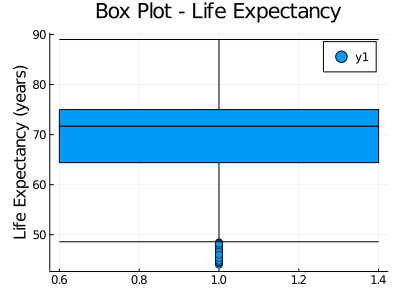

In [30]:
# Graficando en Box Plot para observar los datos atípicos
boxplot(df.Life_expectancy, title = "Box Plot - Life Expectancy", ylabel = "Life Expectancy (years)", size=(400,300))

<p style='text-align: justify;'> 
  Se puede observar que hay pocos valores atípicos en los datos, estos logramos verlos repesentados debajo de la hoja inferior.
  Vamos a proceder a eliminar estos datos y proceder con el proceso de limpieza de nuestro conjunto de datos
</p>

In [40]:
# Removiendo los valores atípicos
first_percentile = percentile(df.Life_expectancy, 25)
iqr_value = iqr(df.Life_expectancy)
df = df[df.Life_expectancy .>  (first_percentile - 1.5*iqr_value),:];

<h3> 3.4 Análisis de la gráfica de densidad </h3>
<p style='text-align: justify;'> 
    Vamos a observar nuestra variable objetivo como se comporta creando una gráfica de densidad, esto nos ayuda por ejemplo en el caso de La regresión lineal, funciona bien cuando la variable y está normalmente distribuida o cerca de la distribución normal. 
  Veamos la distribución de la variable Y, es decir, la esperanza de vida
</p>

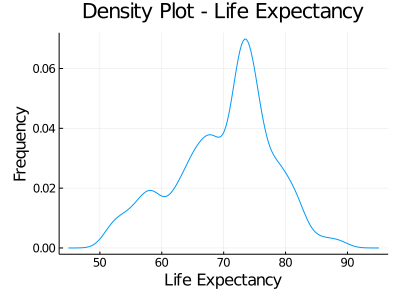

In [41]:
# Gráfica de densidad
density(df.Life_expectancy , title = "Density Plot - Life Expectancy", ylabel = "Frequency", xlabel = "Life Expectancy", legend = false, size=(400,300))

<p style='text-align: justify;'> 
  Podemos observar que la distribución tiene un par de mini picos, lo que es indicativo de una mezcla de varias distribuciones. Sin embargo, la distribución general tiene una curva de campana, donde posiblemente nuestros datos podrían adaptarse muy bien a un modelo lineal
</p>
 

<h3> 3.5 Análisis de correlación </h3>
<p style='text-align: justify;'> 
    Veamos el coeficiente de correlación y el diagrama de dispersión, para esto vamos a tomar nuestra variable objetivo Y, es decir al esperanza de vida en relación a la Tasa de mortalidad de adultos
</p>

In [42]:
println("Corelación de la Esperanza de vida con La taza de mortalidad de adultos es ", cor(df.Adult_Mortality,df.Life_expectancy), "\n\n")

Corelación de la Esperanza de vida con La taza de mortalidad de adultos es -0.6756467502589402




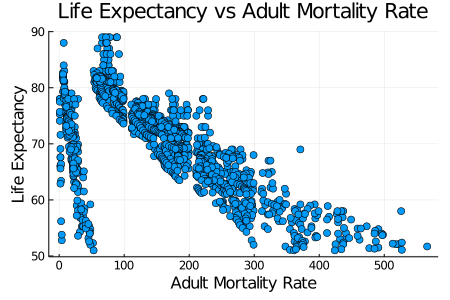

In [43]:
# Scatter plot
train_plot = scatter(df.Adult_Mortality,df.Life_expectancy, title = "Life Expectancy vs Adult Mortality Rate", ylabel = "Life Expectancy", xlabel = "Adult Mortality Rate",legend = false, size=(450,300))

Las dos características se ven correlacionadas linealmente. Todavía hay algunos puntos que tienen un comportamiento diferente.

Alguna otra característica podría explicar esta relación. 

<div align="center">
  <h2> 4. PREPROCESAMIENTO DE LOS DATOS </h2>
</div>
<p style='text-align: justify;'> 
  El preprocesamiento de datos es uno de los pasos más importantes en la construcción de modelos. Los datos ya se tratan para valores atípicos y nombres de columna. Veamos las columnas categóricas ahora.
</p>
<h3> 4.1 One Hot Encoding </h3>
<p style='text-align: justify;'> 
    Vamos a convertir nuestras variables categóricas para lograr formar múltiples columnas numéricas - (normalización de los datosÇ) ya que hay categorías. Esto nos va a ayudar para que las variables puedan introducirse en los algoritmos de de aprendizaje automático para hacer un mejor trabajo en la predicción.
</p>


In [44]:
# One hot encoding
scaled_feature = Lathe.preprocess.OneHotEncode(df,:Status)
select!(df, Not([:Status,:Country]))
first(df,5)

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure
,Int64,Float64,Int64,Int64,Float64,Float64
1,2015,65.0,263,62,0.01,71.2796
2,2014,59.9,271,64,0.01,73.5236
3,2013,59.9,268,66,0.01,73.2192
4,2012,59.5,272,69,0.01,78.1842
5,2011,59.2,275,71,0.01,7.09711


<h3> 4.2 Visualizar los datos con el embebimiento BH Tsne</h3>
<p style='text-align: justify;'> 
    La incrustación de vecinos estocásticos distribuidos en t (t-SNE) es una técnica para la reducción de dimensionalidad que es particularmente adecuada para la visualización de conjuntos de datos de alta dimensión.
</p>

In [38]:
# Instalando el paquete para Tsne para poder realizar el embebimiento de los datos
Pkg.add("TSne")
Pkg.add("MLDatasets")
using TSne, Statistics, MLDatasets

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [76]:
# Convirtiendo en Matrix nuestro set de datos 
df_matriz=convert(Matrix,df)

1590×22 Array{Float64,2}:
 2015.0  65.0  263.0  62.0  0.01  …  17.2  17.3  0.479  10.1  1.0  0.0
 2014.0  59.9  271.0  64.0  0.01     17.5  17.5  0.476  10.0  1.0  0.0
 2013.0  59.9  268.0  66.0  0.01     17.7  17.7  0.47    9.9  1.0  0.0
 2012.0  59.5  272.0  69.0  0.01     17.9  18.0  0.463   9.8  1.0  0.0
 2011.0  59.2  275.0  71.0  0.01     18.2  18.2  0.454   9.5  1.0  0.0
 2010.0  58.8  279.0  74.0  0.01  …  18.4  18.4  0.448   9.2  1.0  0.0
 2009.0  58.6  281.0  77.0  0.01     18.6  18.7  0.434   8.9  1.0  0.0
 2008.0  58.1  287.0  80.0  0.03     18.8  18.9  0.433   8.7  1.0  0.0
 2007.0  57.5  295.0  82.0  0.02     19.0  19.1  0.415   8.4  1.0  0.0
 2006.0  57.3  295.0  84.0  0.03     19.2  19.3  0.405   8.1  1.0  0.0
 2005.0  57.3  291.0  85.0  0.02  …  19.3  19.5  0.396   7.9  1.0  0.0
 2004.0  57.0  293.0  87.0  0.02     19.5  19.7  0.381   6.8  1.0  0.0
 2003.0  56.7  295.0  87.0  0.01     19.7  19.9  0.373   6.5  1.0  0.0
    ⋮                             ⋱                

In [83]:
CSV.write("MatrizData.csv", df)

"MatrizData.csv"

In [68]:
  # Realizando el proceso de embebimiento
  rescale(A; dims=1) = (A .- mean(A, dims=dims)) ./ max.(std(A, dims=dims), eps())


  data = reshape(permutedims(df_matriz[:, :, 1:2500], (3, 1, 2)),
                 2500, size(df_matriz, 1)*size(df_matriz, 2));
  # Normalize the data, this should be done if there are large scale differences in the dataset
  X = rescale(data, dims=1);

  Y = tsne(X, 2, 50, 1000, 20.0);

  theplot = scatter(Y[:,1], Y[:,2], marker=(2,2,:auto,stroke(0)), color=Int.(allabels[1:size(Y,1)]))
  Plots.pdf(theplot, "life_expectancy_tsne.pdf")

BoundsError: BoundsError: attempt to access 1590×22 Array{Float64,2} at index [Base.Slice(Base.OneTo(1590)), Base.Slice(Base.OneTo(22)), 1:2500]

<h3> 4.3 Partiendo el conjunto de datos </h3>
<p style='text-align: justify;'> 
    Vamos a partir el conjunto de nuestros datos en entrenamiento y prueba
</p>

In [84]:
Pkg.add("MLDataUtils")
using(MLDataUtils)
train, test = splitobs(df, at = 0.75);

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


<div align="center">
  <h2> 5. CONSTRUCCIÓN DEL MODELO</h2>
</div>
<p style='text-align: justify;'> 
  Se va a construir el modelo de regresión lineal usando el paquete "GLM". Es muy similar al paquete "GLM" en R.

  Comencemos con una variable.

Para entrenar un modelo de regresión lineal, use la función que acepta un objeto de fórmula como primer argumento. Use para crear el objeto de fórmula requerido.lm()@formula
</p>


In [85]:
fm = @formula(Life_expectancy ~ Adult_Mortality)
linearRegressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Life_expectancy ~ 1 + Adult_Mortality

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                   Estimate  Std. Error   t value  Pr(>|t|)   Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)      78.569       0.303499   258.877     <1e-99  77.9736     79.1645
Adult_Mortality  -0.0534465   0.0016448  -32.4943    <1e-99  -0.0566735  -0.0502194
───────────────────────────────────────────────────────────────────────────────────

<div align="center">
  <h2> 6. PREDICCIÓN Y RENDIMIENTO DEL MODELO</h2>
</div>

  - Error aboslute medio
- Error porcentual absoluto medio
- Error cuadrático medio
- Error medio cuadrado
- Distribución de errores
<p style='text-align: justify;'> 

Creemos las métricas de rendimiento. Me gustaría ver las métricas de rendimiento tanto para los datos de entrenamiento como para los datos de prueba.

Ahora que el modelo está listo, pronostiquemos tanto los datos de entrenamiento como de prueba y los errores al cuadrado de cmopute.
</p>

In [86]:
# Prediction
ypredicted_test = predict(linearRegressor, test)
ypredicted_train = predict(linearRegressor, train)

# Test Performance DataFrame (compute squared error)
performance_testdf = DataFrame(y_actual = test[!,:Life_expectancy], y_predicted = ypredicted_test)
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error

# Train Performance DataFrame (compute squared error)
performance_traindf = DataFrame(y_actual = train[!,:Life_expectancy], y_predicted = ypredicted_train)
performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error ;

Ahora, calculemos el Error porcentual absoluto medio (MAPE).

In [87]:
# MAPE function defination
function mape(performance_df)
    mape = mean(abs.(performance_df.error./performance_df.y_actual))
    return mape
end

mape (generic function with 1 method)

Ahora calcule el error cuadrático medio (RMSE)

In [88]:
# RMSE function defination
function rmse(performance_df)
    rmse = sqrt(mean(performance_df.error.*performance_df.error))
    return rmse
end

rmse (generic function with 1 method)

Las funciones para calcular errores están listas. Ahora, calculemos en los datos de prueba y entrenamiento.

In [91]:
# Error en los datos de Prueba
println("Error absoluto medio en Test: ",mean(abs.(performance_testdf.error)), "\n")
println("Error porcentual absoluto medio en Test: ",mape(performance_testdf), "\n")
println("Error cuadrático medio en Test: ",rmse(performance_testdf), "\n")
println("Error medio cuadrado en Test: ",mean(performance_testdf.error_sq), "\n")

Error absoluto medio en Test: 3.6972953846911425

Error porcentual absoluto medio en Test: 0.05505602152003607

Error cuadrático medio en Test: 5.495483363962696

Error medio cuadrado en Test: 30.200337403590748



In [92]:
#  Error en los datos de Entrenamiento
println("Error absoluto medio en Entrenamiento: ",mean(abs.(performance_traindf.error)), "\n")
println("Error porcentual absoluto medio en Entrenamiento: ",mape(performance_traindf), "\n")
println("Error cuadrático medio en Entrenamiento: ",rmse(performance_traindf), "\n")
println("Error medio cuadrado en Entrenamiento: ",mean(performance_traindf.error_sq), "\n")

Error absoluto medio en Entrenamiento: 4.379577081780567

Error porcentual absoluto medio en Entrenamiento: 0.06404899922464939

Error cuadrático medio en Entrenamiento: 5.893353215713998

Error medio cuadrado en Entrenamiento: 34.73161212516652



Veamos la distribución del error residual. No debe haber ningún patrón para el error y debe seguir una distribución normal. Estaría usando un histograma para el análisis de errores residuales tanto del entrenamiento como del conjunto de datos de prueba

### Distribución de los Errores

In [1]:
# Histograma del error en los datos de prueba
histogram(performance_testdf.error, bins = 50, title = "Análisis del eror en los datos de prueba", ylabel = "Frecuencia", xlabel = "Error",legend = false, size=(450,300))

UndefVarError: UndefVarError: histogram not defined

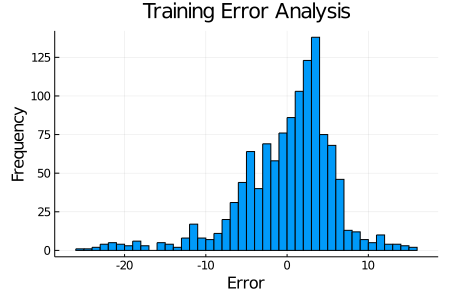

In [98]:
# Histograma del error en los datos de entrenamiento
histogram(performance_traindf.error, bins = 50, title = "Training Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false, size=(450,300))

Se distribuye casi normalmente, pero todavía hay algunos valores atípicos. Ahora veamos los valores reales y pronosticados usando un diagrama de dispersión. No debería haber ningún patrón específico.

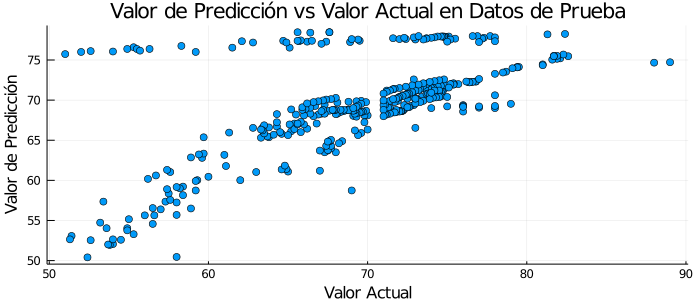

In [101]:
# Scatter plot de los valores actuales vs los datos de prueba
test_plot = scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted], title = "Valor de Predicción vs Valor Actual en Datos de Prueba", ylabel = "Valor de Predicción", xlabel = "Valor Actual", legend = false, size=(700,300))

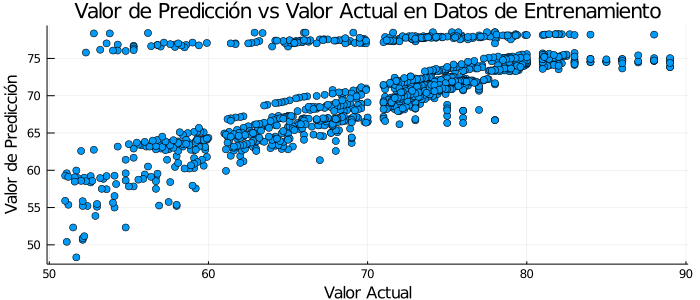

In [102]:
# Scatter plot de los valores actuales vs los datos de entrenamiento
train_plot = scatter(performance_traindf[!,:y_actual],performance_traindf[!,:y_predicted], title = "Valor de Predicción vs Valor Actual en Datos de Entrenamiento", ylabel = "Valor de Predicción", xlabel = "Valor Actual", legend = false, size=(700,300))

Definitivamente hay un problema con el modelo que acabo de crear, no puede explicar el efecto en algunos de los puntos de datos.

<div align="center">
  <h2> 7. VALIDACIÓN CRUZADA</h2>
</div>


In [106]:
# Definición de la función de validación cruzada
function cross_validation(train,k, fm = @formula(Life_expectancy ~ Adult_Mortality))
    a = collect(Kfold(size(train)[1], k))
    for i in 1:k
        row = a[i]
        temp_train = train[row,:]
        temp_test = train[setdiff(1:end, row),:]
        linearRegressor = lm(fm, temp_train)
        performance_testdf = DataFrame(y_actual = temp_test[!,:Life_expectancy], y_predicted = predict(linearRegressor, temp_test))
        performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]

        println("Error medio del conjunto $i is ",mean(abs.(performance_testdf.error)))
    end
end

cross_validation (generic function with 2 methods)

In [107]:
cross_validation(train,10)

Error medio del conjunto 1 is 4.711644897620673
Error medio del conjunto 2 is 4.09338311719634
Error medio del conjunto 3 is 4.23861378725567
Error medio del conjunto 4 is 3.969266668812219
Error medio del conjunto 5 is 4.663040366433139
Error medio del conjunto 6 is 4.311321766359501
Error medio del conjunto 7 is 4.249447244647614
Error medio del conjunto 8 is 4.671940230261486
Error medio del conjunto 9 is 4.61943968042891
Error medio del conjunto 10 is 4.326771815748341


<div align="center">
  <h2> 8. MODELO EN REGRESIÓN MÚLTIPLE</h2>
</div>
<p style='text-align: justify;'> 
En este momento, ya tenemos una mejor comprensión de cómo implementar la regresión lineal utilizando solo una variable independiente en Julia. Pero en escenarios prácticos, habría múltiples variables independientes. Los conceptos centrales de los que hablé serían los mismos. Veamos la implementación.
  
  Vamos a usar 7 características para construir el modelo de regresión.
</p>

In [108]:
fm = @formula(Life_expectancy ~ Adult_Mortality + infant_deaths + Developing + BMI + Total_expenditure + HIV_AIDS   + Income_composition_of_resources)
linearRegressor = lm(fm, train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Life_expectancy ~ 1 + Adult_Mortality + infant_deaths + Developing + BMI + Total_expenditure + HIV_AIDS + Income_composition_of_resources

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────────────────
                                    Estimate  Std. Error    t value  Pr(>|t|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                      60.301       0.800889     75.2926     <1e-99  58.7297      61.8724
Adult_Mortality                  -0.0209523   0.00136296  -15.3726     <1e-48  -0.0236263   -0.0182782
infant_deaths                    -0.00324673  0.00082718   -3.92506    <1e-4   -0.00486963  -0.00162383
Developing                       -1.69609     0.339529    

In [109]:
# R Square value of the model
r2(linearRegressor)

0.7814053329534851

### Diagnosticos modelo
El valor p, el valor t y el valor R-cuadrado de todas las características es estadísticamente significativo. Así que este es un buen modelo desde una perspectiva de diagnóstico. Es mejor que el anterior. Echemos un vistazo al rendimiento del modelo en predicción

In [110]:
# Prediction
ypredicted_test = predict(linearRegressor, test)
ypredicted_train = predict(linearRegressor, train)

# Test Performance DataFrame
performance_testdf = DataFrame(y_actual = test[!,:Life_expectancy], y_predicted = ypredicted_test)
performance_testdf.error = performance_testdf[!,:y_actual] - performance_testdf[!,:y_predicted]
performance_testdf.error_sq = performance_testdf.error.*performance_testdf.error

# Train Performance DataFrame
performance_traindf = DataFrame(y_actual = train[!,:Life_expectancy], y_predicted = ypredicted_train)
performance_traindf.error = performance_traindf[!,:y_actual] - performance_traindf[!,:y_predicted]
performance_traindf.error_sq = performance_traindf.error.*performance_traindf.error ;

In [111]:
# Error en los datos de Prueba
println("Error absoluto medio en Test: ",mean(abs.(performance_testdf.error)), "\n")
println("Error porcentual absoluto medio en Test: ",mape(performance_testdf), "\n")
println("Error cuadrático medio en Test: ",rmse(performance_testdf), "\n")
println("Error medio cuadrado en Test: ",mean(performance_testdf.error_sq), "\n")

Error absoluto medio en Test: 2.8986531398948765

Error porcentual absoluto medio en Test: 0.044632430902131474

Error cuadrático medio en Test: 4.290690386010724

Error medio cuadrado en Test: 18.41002398860486



In [112]:
#  Error en los datos de Entrenamiento
println("Error absoluto medio en Entrenamiento: ",mean(abs.(performance_traindf.error)), "\n")
println("Error porcentual absoluto medio en Entrenamiento: ",mape(performance_traindf), "\n")
println("Error cuadrático medio en Entrenamiento: ",rmse(performance_traindf), "\n")
println("Error medio cuadrado en Entrenamiento: ",mean(performance_traindf.error_sq), "\n")

Error absoluto medio en Entrenamiento: 2.8246059629362494

Error porcentual absoluto medio en Entrenamiento: 0.0417310125955271

Error cuadrático medio en Entrenamiento: 3.7853141747497916

Error medio cuadrado en Entrenamiento: 14.328603401561697



### Distribución de errores

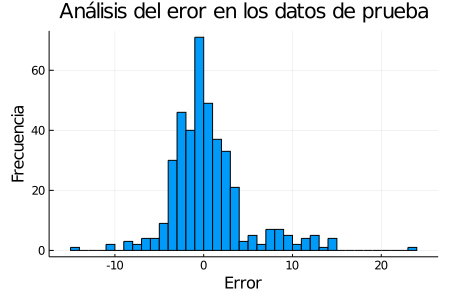

In [113]:
# Histograma del error en los datos de prueba
histogram(performance_testdf.error, bins = 50, title = "Análisis del eror en los datos de prueba", ylabel = "Frecuencia", xlabel = "Error",legend = false, size=(450,300))

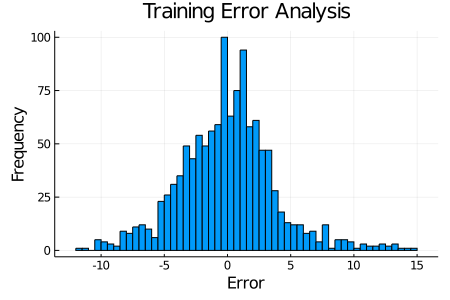

In [114]:
# Histograma del error en los datos de entrenamiento
histogram(performance_traindf.error, bins = 50, title = "Training Error Analysis", ylabel = "Frequency", xlabel = "Error",legend = false, size=(450,300))

Se distribuye casi normalmente, la distribución de errores también es mejor que el modelo anterior. Veamos los valores pronosticados usando el diagrama de dispersión

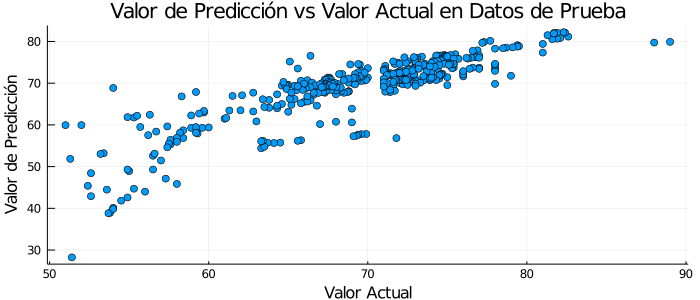

In [115]:
# Scatter plot de los valores actuales vs los datos de prueba
test_plot = scatter(performance_testdf[!,:y_actual],performance_testdf[!,:y_predicted], title = "Valor de Predicción vs Valor Actual en Datos de Prueba", ylabel = "Valor de Predicción", xlabel = "Valor Actual", legend = false, size=(700,300))

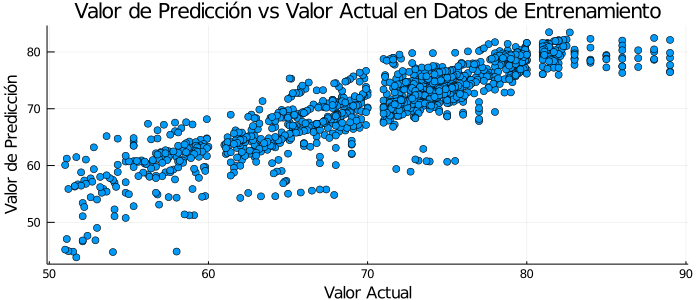

In [116]:
# Scatter plot de los valores actuales vs los datos de entrenamiento
train_plot = scatter(performance_traindf[!,:y_actual],performance_traindf[!,:y_predicted], title = "Valor de Predicción vs Valor Actual en Datos de Entrenamiento", ylabel = "Valor de Predicción", xlabel = "Valor Actual", legend = false, size=(700,300))

Las predicciones están muy cerca de los valores reales. El patrón en algunos puntos de datos también ha sido explicado ahora por variables independientes. Echemos un vistazo a la puntuación de validación cruzada.

### Validación cruzada

In [118]:
cross_validation(train,10, fm)

Error medio del conjunto 1 is 2.9014159612605694
Error medio del conjunto 2 is 2.5086147198482434
Error medio del conjunto 3 is 2.744276087621274
Error medio del conjunto 4 is 2.960377623161051
Error medio del conjunto 5 is 2.8033092871822625
Error medio del conjunto 6 is 2.7738341971701974
Error medio del conjunto 7 is 3.039461601937396
Error medio del conjunto 8 is 2.8746602481772547
Error medio del conjunto 9 is 2.9635902587804073
Error medio del conjunto 10 is 2.8782350748049255


El error no varía mucho. El modelo no está sobreajustado.

Al observar los diferentes parámetros y métricas de evaluación, se puede concluir que el modelo es bastante bueno.

Ahora veamos uno de los temas menos conocidos pero de alto valor en regresión lineal.